In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

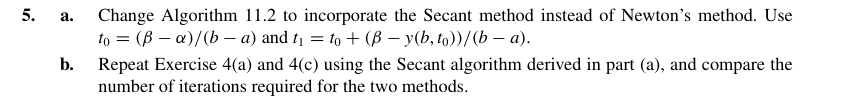

In [72]:
def nonlinear_shooting_method(dy, x_range, y_range, first_guess, second_guess, h):
    '''
    x_range: [x_start, x_end]
    y_range: [y(x_start), y(x_end)]
    '''
    x_points = [(x_range[0] + i * h) for i in range(int((x_range[1] - x_range[0]) / h + 1))]

    y1_0 = y_range[0]
    y0 = [y1_0, first_guess]
    res = solve_ivp(dy, x_range, y0, 'RK45', x_points)
    y_end_guess1 = res.y[0, -1]
    plt.plot(res.t, res.y[0], ':o', label=f"guess={first_guess}")


    y1_0 = y_range[0]
    y0 = [y1_0, second_guess]
    res = solve_ivp(dy, x_range, y0, 'RK45', x_points)
    y_end_guess2 = res.y[0, -1]
    plt.plot(res.t, res.y[0], ':o', label=f"guess={second_guess}")


    for i in range(20):
        y2_0 = second_guess - (y_end_guess2 - y_range[1]) * (second_guess - first_guess) / (y_end_guess2 - y_end_guess1)
        first_guess = second_guess
        y_end_guess1 = y_end_guess2

        second_guess = y2_0
        y0 = [y1_0, second_guess]
        res = solve_ivp(dy, x_range, y0, 'RK45', x_points)
        y_end_guess2 = res.y[0, -1]

        plt.plot(res.t, res.y[0], ':o', label=f"guess={second_guess}")
        if abs(second_guess - first_guess) < 0.0001:
            break 
        
    plt.legend()
    plt.show()


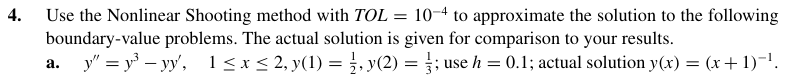

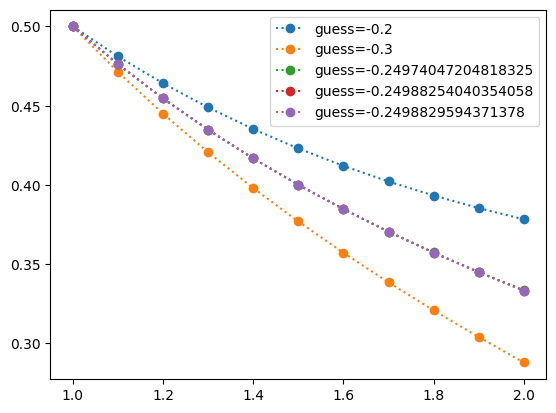

In [73]:
dy = lambda x, y: [y[1], y[0]**3 - y[0] * y[1]]
nonlinear_shooting_method(dy, [1, 2], [1 / 2, 1 / 3], -0.2, -0.3, 0.1)

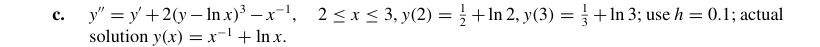

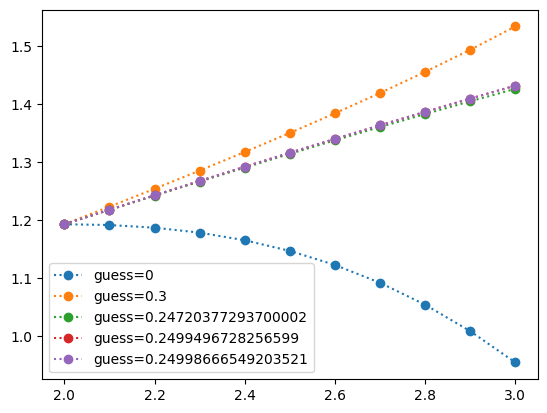

In [75]:
dy = lambda x, y: [y[1], y[1] + 2 * (y[0] - np.log(x))**3 - x**-1]
nonlinear_shooting_method(dy, [2, 3], [1 / 2 + math.log(2), 1 / 3 + math.log(3)], 0, 0.3, 0.1)